In [1]:
# Importamos bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Ahora que ya probamos predececir el precio de las casas con un modelo de regresión lineal con calculos a mano, vamos a hacerlo con un modelo de regresión lineal con la librería scikit-learn

In [2]:
# Usamos pandas para abrir nuestro dataset
df = pd.read_csv('AmesHousing.csv')

# Seleccionar solo las columnas numéricas para facilitar los calculos
numeric_df = df.select_dtypes(include=[np.number])


# Veamos un par de las primeras filas
print(numeric_df.head())


   Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           20          93.0     11160             7   
4      5  527105010           60          74.0     13830             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  Wood Deck SF  \
0             5        1960            1960         112.0  ...           210   
1             6        1961            1961           0.0  ...           140   
2             6        1958            1958         108.0  ...           393   
3             5        1968            1968           0.0  ...             0   
4             5        1997            1998           0.0  ...           212   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0

In [3]:
# Veamos si hay valores nulos
print("Datos faltantes por columna:")
print(numeric_df.isnull().sum())
# Veamos si hay valores infinitos
print("\nDatos finitos por columna:")
print(np.isfinite(numeric_df).sum())

# Eliminar filas con datos faltantes
numeric_df = numeric_df.dropna()

Datos faltantes por columna:
Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

Datos finitos por columna:
Order              2930
PID      

In [4]:
# Verificar nuevamente después de eliminar filas con datos faltantes
print("\nDatos faltantes después de eliminar filas con NaN:")
print(numeric_df.isnull().sum())

print("\nDatos finitos después de eliminar filas con NaN:")
print(np.isfinite(numeric_df).sum())


Datos faltantes después de eliminar filas con NaN:
Order              0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

Datos finitos después de eliminar filas con NaN:
Order              2274
PID                2274
MS SubClass       

In [5]:
correlation_matrix = numeric_df.corr() # Usamos corr de pandas para calcular la correlación
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Mostrar las 10 características más correlacionadas con SalePrice
print(correlation_with_saleprice.head(21))

SalePrice         1.000000
Overall Qual      0.803944
Gr Liv Area       0.714171
Garage Cars       0.661288
Garage Area       0.647847
Total Bsmt SF     0.645715
1st Flr SF        0.638762
Full Bath         0.559935
Year Built        0.559622
Garage Yr Blt     0.541860
Year Remod/Add    0.538240
Mas Vnr Area      0.527794
TotRms AbvGrd     0.523273
Fireplaces        0.461333
BsmtFin SF 1      0.435783
Lot Frontage      0.351406
Wood Deck SF      0.330650
Open Porch SF     0.330339
Lot Area          0.309177
Bsmt Full Bath    0.282927
Half Bath         0.269068
Name: SalePrice, dtype: float64


In [6]:
# Trasformar la característica 'Year Built' en 'House Age' para que sea más fácil de interpretar
dataset_year = 2020 # Suponiendo que el dataset se recopila en 2020
numeric_df['House Age'] = dataset_year - numeric_df['Year Built'] # Año actual - Año de construcción

# Asignaremos las caracteristicas a X_train y la variable objetivo SalePrice a y_train
X_train = numeric_df[['Overall Qual', 'Gr Liv Area', 'House Age', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF','Full Bath','Garage Yr Blt','Year Remod/Add','Mas Vnr Area','TotRms AbvGrd','Fireplaces','BsmtFin SF 1','Lot Frontage','Wood Deck SF','Open Porch SF', 'Lot Area','Bsmt Full Bath','Half Bath']]
y_train = numeric_df['SalePrice']

# Transformar SalePrice a miles para facilitar la interpretación
y_train = y_train / 1000

print(X_train.head())
print(y_train.head())

# Convertir a NumPy arrays para facilitar el manejo
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_features = ['Overall Qual', 'Gr Liv Area', 'House Age', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF','Full Bath','Garage Yr Blt','Year Remod/Add','Mas Vnr Area','TotRms AbvGrd','Fireplaces','BsmtFin SF 1','Lot Frontage','Wood Deck SF','Open Porch SF', 'Lot Area','Bsmt Full Bath','Half Bath']

   Overall Qual  Gr Liv Area  House Age  Garage Area  Garage Cars  \
0             6         1656         60        528.0          2.0   
1             5          896         59        730.0          1.0   
2             6         1329         62        312.0          1.0   
3             7         2110         52        522.0          2.0   
4             5         1629         23        482.0          2.0   

   Total Bsmt SF  1st Flr SF  Full Bath  Garage Yr Blt  Year Remod/Add  \
0         1080.0        1656          1         1960.0            1960   
1          882.0         896          1         1961.0            1961   
2         1329.0        1329          1         1958.0            1958   
3         2110.0        2110          2         1968.0            1968   
4          928.0         928          2         1997.0            1998   

   Mas Vnr Area  TotRms AbvGrd  Fireplaces  BsmtFin SF 1  Lot Frontage  \
0         112.0              7           2         639.0         1

### Ahora vamos a escalar/normalizar los datos

In [7]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Rango máximo por columna en Raw        X:{np.ptp(X_train, axis=0)}")   
print(f"Rango máximo por columna en Normalized X:{np.ptp(X_norm, axis=0)}")

Rango máximo por columna en Raw        X:[9.00000e+00 5.23500e+03 1.31000e+02 1.38800e+03 4.00000e+00 6.11000e+03
 4.68800e+03 4.00000e+00 1.15000e+02 6.00000e+01 1.60000e+03 1.20000e+01
 4.00000e+00 5.64400e+03 2.92000e+02 8.70000e+02 5.70000e+02 2.13945e+05
 2.00000e+00 2.00000e+00]
Rango máximo por columna en Normalized X:[ 6.32877167 10.43361249  4.25777531  7.16196426  5.98093284 13.65031894
 11.85933433  7.33453706  4.39505847  2.83664421  8.69846933  7.76120516
  6.26707773 12.11326196 12.49945896  7.11019733  8.64663759 32.78559173
  3.86854855  4.03290392]


### Entonces con los datos normalizados, ahora vamos a entrenar el modelo de regresión

In [8]:
# Entrenar el modelo
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"número de iteraciones completadas: {sgdr.n_iter_}, número de actualizaciones de pesos: {sgdr.t_}")

SGDRegressor()
número de iteraciones completadas: 10, número de actualizaciones de pesos: 22741.0


In [9]:
# Ahora veamos los parámetros del modelo

b_norm = sgdr.intercept_
w_norm = sgdr.coef_

# Tranformar a valor float con 6 decimales para comparar directamente con los valores calculados a mano
w_norm_str = np.array2string(w_norm, formatter={'float_kind': lambda x: "%.6f" % x})
b_norm_str = np.array2string(b_norm, formatter={'float_kind': lambda x: "%.6f" % x})

print(f"parámetros del modelo entrenado con sklearn: w: {w_norm_str}, b: {b_norm_str}")
print("""parámetros del modelo que entrenamos con calculos a mano: w: [29.39342141 21.37780455 -5.07578095  5.34087418  5.85970873  5.27748233 
      1.07801536 -0.74648869 -0.82134367  7.60185363  6.75291136 -0.14261406 4.34796313  6.6277396   1.17998208  2.16005937 -1.03840209  
      4.74798361 3.61789898  0.13010886], b: 184.39""")


parámetros del modelo entrenado con sklearn: w: [30.188804 21.204773 -4.726649 5.927414 6.389867 6.017637 3.012405
 -0.110190 -0.664148 7.544916 7.775209 0.636032 4.724985 7.961299 2.593085
 2.287575 -0.541641 5.448231 4.518123 0.410386], b: [185.037765]
parámetros del modelo que entrenamos con calculos a mano: w: [29.39342141 21.37780455 -5.07578095  5.34087418  5.85970873  5.27748233 
      1.07801536 -0.74648869 -0.82134367  7.60185363  6.75291136 -0.14261406 4.34796313  6.6277396   1.17998208  2.16005937 -1.03840209  
      4.74798361 3.61789898  0.13010886], b: 184.39


## Vemos que los valores son muy similares, por lo que podemos decir que el modelo ha sido entrenado correctamente

In [10]:
# Hacer una predicción usando sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# Hacer una predicción usando w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm

# Comprobar si las predicciones usando np.dot() y sgdr.predict coinciden
print(f"Las predicciones usando np.dot() y sgdr.predict coinciden: {(y_pred == y_pred_sgd).all()}")

print("Predicción en el conjunto de entrenamiento:")
print(y_pred)
print("\nValores objetivo:")
print(y_train)

m = len(y_train)
for i in range(m):
    print(f"Predicción: {y_pred[i]:0.2f}, Valor objetivo: {y_train[i]}")

Las predicciones usando np.dot() y sgdr.predict coinciden: True
Predicción en el conjunto de entrenamiento:
[231.01635425 109.9077165  164.83771597 ... 161.39016201 174.69881039
 250.66525884]

Valores objetivo:
[215.  105.  172.  ... 142.5 170.  188. ]
Predicción: 231.02, Valor objetivo: 215.0
Predicción: 109.91, Valor objetivo: 105.0
Predicción: 164.84, Valor objetivo: 172.0
Predicción: 270.06, Valor objetivo: 244.0
Predicción: 177.74, Valor objetivo: 189.9
Predicción: 195.63, Valor objetivo: 195.5
Predicción: 225.13, Valor objetivo: 213.5
Predicción: 199.21, Valor objetivo: 191.5
Predicción: 260.68, Valor objetivo: 236.5
Predicción: 207.12, Valor objetivo: 189.0
Predicción: 175.73, Valor objetivo: 175.9
Predicción: 163.35, Valor objetivo: 180.4
Predicción: 217.13, Valor objetivo: 171.5
Predicción: 432.48, Valor objetivo: 538.0
Predicción: 240.37, Valor objetivo: 164.0
Predicción: 351.74, Valor objetivo: 394.432
Predicción: 85.41, Valor objetivo: 141.0
Predicción: 253.51, Valor objet

### Vemos que las predicciones son muy cercanas a los valores objetivo y si las comparamos con las de las calculadas a mano son muy similares también.

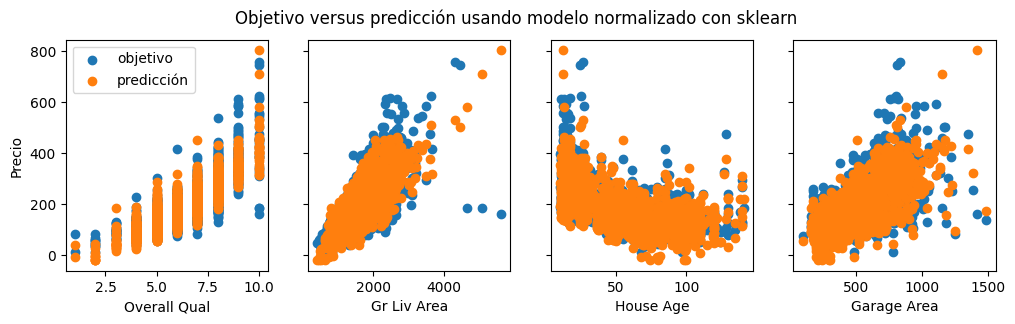

In [11]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'objetivo')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predicción')
ax[0].set_ylabel("Precio"); ax[0].legend();
fig.suptitle("Objetivo versus predicción usando modelo normalizado con sklearn")
plt.show()